# Test Dispersion

Brendan Smithyman | January 2016

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from zephyr.backend import ViscoMultiFreq, MultiFreq, MiniZephyrHD, SparseKaiserSource

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

In [4]:
systemConfig = {
    'dx':       1.,         # m
    'dz':       1.,         # m
    'c':        2500.,      # m/s
    'rho':      1.,         # kg/m^3
    'nx':       100,        # count
    'nz':       200,        # count
    'freqs':    [2e2, 3e2], # Hz
    'disc':     MiniZephyrHD,
    'Q':        20,
    'freqBase': 200.,       # Hz
}

nx = systemConfig['nx']
nz = systemConfig['nz']
dx = systemConfig['dx']
dz = systemConfig['dz']

In [5]:
MF = MultiFreq(systemConfig)
VMF = ViscoMultiFreq(systemConfig)
SKS = SparseKaiserSource(systemConfig)

xs, zs = 25, 25
sloc = np.array([xs, zs]).reshape((1,2))
q = SKS(sloc)

uMF = list(MF*q)
uVMF = list(VMF*q)

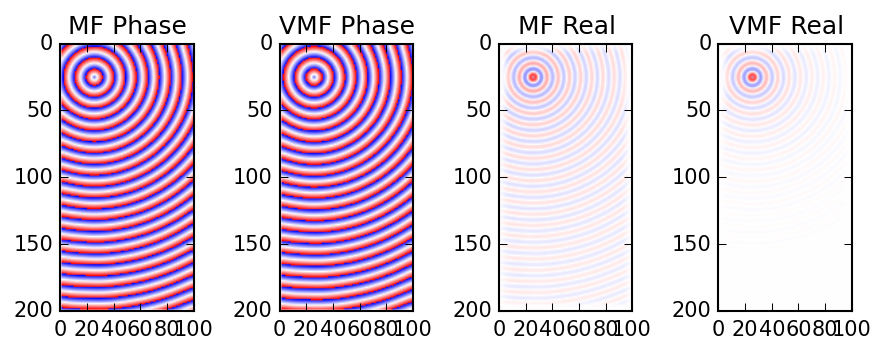

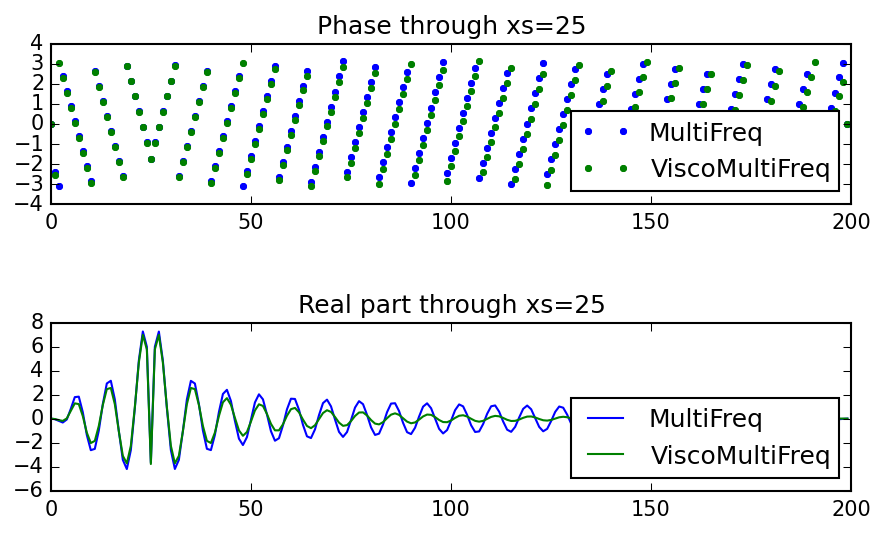

In [6]:
clip = 10
fid = 1

plotopts = {
    'vmin':     -np.pi,
    'vmax':     np.pi,
    'extent':   [0., dx * nx, dz * nz, 0.],
    'cmap':     cm.bwr,                
}

fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
plt.imshow(np.angle(uMF[fid].reshape((nz, nx))), **plotopts)
plt.title('MF Phase')

ax2 = fig.add_subplot(1,4,2)
plt.imshow(np.angle(uVMF[fid].reshape((nz, nx))), **plotopts)
plt.title('VMF Phase')

plotopts.update({
    'vmin':     -clip,
    'vmax':     clip,
})

ax3 = fig.add_subplot(1,4,3)
plt.imshow(uMF[fid].reshape((nz, nx)).real, **plotopts)
plt.title('MF Real')

ax4 = fig.add_subplot(1,4,4)
plt.imshow(uVMF[fid].reshape((nz, nx)).real, **plotopts)
plt.title('VMF Real')

fig.tight_layout()

# ---

fig = plt.figure()

ax = fig.add_subplot(2,1,1, aspect=5)

plt.plot(np.angle(uMF[fid]).reshape((nz, nx))[:,xs], '.', label='MultiFreq')
plt.plot(np.angle(uVMF[fid]).reshape((nz, nx))[:,xs], '.', label='ViscoMultiFreq')
plt.legend(loc=4)
plt.title('Phase through xs=%d'%xs)

ax = fig.add_subplot(2,1,2, aspect=3)

plt.plot(uMF[fid].real.reshape((nz, nx))[:,xs], label='MultiFreq')
plt.plot(uVMF[fid].real.reshape((nz, nx))[:,xs], label='ViscoMultiFreq')
plt.legend(loc=4)
plt.title('Real part through xs=%d'%xs)

fig.tight_layout()